In [28]:
from skbeam.core import utils
from skbeam.core.roi import circular_average, construct_circ_avg_image
import numpy as np


from matplotlib.pyplot import figure, ion, clf, imshow, clim, xlim,ylim, \
        subplot, loglog, gca, legend
%matplotlib inline

def eqaspect():
    gca().set_aspect('equal')

In [29]:
# load some example data
npdata = np.load("data/imagefill-data.npz")

#this image was averaged over 10 frames
img = npdata['img']
mask = npdata['mask']
x0 = npdata['XCEN']
y0 = npdata['YCEN']
r0 = y0, x0

In [37]:
epsilon = 2.4
sqx, sqy = circular_average(img, r0, mask=mask, min_x=10, max_x = 1400, nx=1300)
# Case 1 : supply the dims and center
cimg = construct_circ_avg_image(sqx, sqy, dims=img.shape, center=(y0, x0))
# Case 2 : supply just the dims
cimg2 = construct_circ_avg_image(sqx, sqy, dims=img.shape)
# Case 3 : supply nothing
cimg3 = construct_circ_avg_image(sqx, sqy)
# Case 4 : supply the dims and center and make anisotropic (rectangular pixels)
cimg4_niso = construct_circ_avg_image(sqx, sqy, dims = img.shape, center=(y0, x0), pixel_size=(1,epsilon))
# Case 5 : supply just the dims and make anisotropic
cimg5_niso = construct_circ_avg_image(sqx, sqy, dims=img.shape, pixel_size=(1,epsilon))
# Case 6 : don't supply the dims or center and make anisotropic
cimg6_niso = construct_circ_avg_image(sqx, sqy, pixel_size=(1,epsilon))

sqx2, sqy2 = circular_average(cimg4_niso, r0, mask=mask, min_x=10, max_x = 1400, nx=1300, pixel_size=(1,epsilon))
sqx3, sqy3 = circular_average(cimg5_niso, ((img.shape[0]-1)/2., (img.shape[1]-1)/2.), mask=mask, min_x=10, max_x = 1400, nx=1300, pixel_size=(1,epsilon))

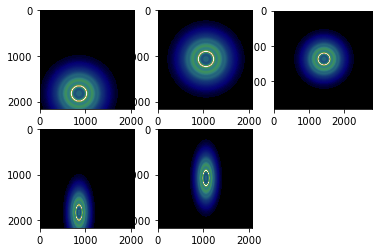

In [38]:
figure(0);clf();
subplot(2,3,1)
imshow(cimg);
eqaspect()
subplot(2,3,2);
imshow(cimg2);
eqaspect()
subplot(2,3,3)
imshow(cimg3);
eqaspect()
subplot(2,3,4)
imshow(cimg4_niso);
eqaspect()
subplot(2,3,5);
imshow(cimg5_niso);
eqaspect()

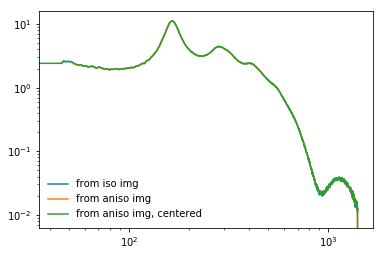

In [39]:
# Now testing pixel_size. If it works correctly then 
# I should be able to reobtain the same circular averaged
# image from the isotropic or non-isotropic image
# (i.e. both curves should agree)
figure(3);clf();
loglog(sqx,sqy,label="from iso img")
loglog(sqx2,sqy2,label="from aniso img")
loglog(sqx3,sqy3,label="from aniso img, centered")
legend()